<a href="https://colab.research.google.com/github/quanndm/kltn/blob/dev/notebooks/from_crash/compare_models_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [2]:
drive.flush_and_unmount()
drive.mount("/content/drive")

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [3]:
def load_metrics(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

In [4]:
import glob
print(glob.glob("/content/drive/MyDrive/KLTN/code/result_model_*.json"))

['/content/drive/MyDrive/KLTN/code/result_model_UNet3D.json', '/content/drive/MyDrive/KLTN/code/result_model_UNet3DWCoT.json', '/content/drive/MyDrive/KLTN/code/result_model_UNet3DWCoTDA.json', '/content/drive/MyDrive/KLTN/code/result_model_UNet3DPretrained_pretrained.json', '/content/drive/MyDrive/KLTN/code/result_model_UNet3DWResNeXtCoT.json']


In [5]:
model_unet3d = load_metrics('/content/drive/MyDrive/KLTN/code/result_model_UNet3D.json')
model_unet3d_cot = load_metrics('/content/drive/MyDrive/KLTN/code/result_model_UNet3DWCoT.json')
model_unet3d_resnext_cot = load_metrics('/content/drive/MyDrive/KLTN/code/result_model_UNet3DWResNeXtCoT.json')
model_unet3d_cot_da = load_metrics('/content/drive/MyDrive/KLTN/code/result_model_UNet3DWCoTDA.json')

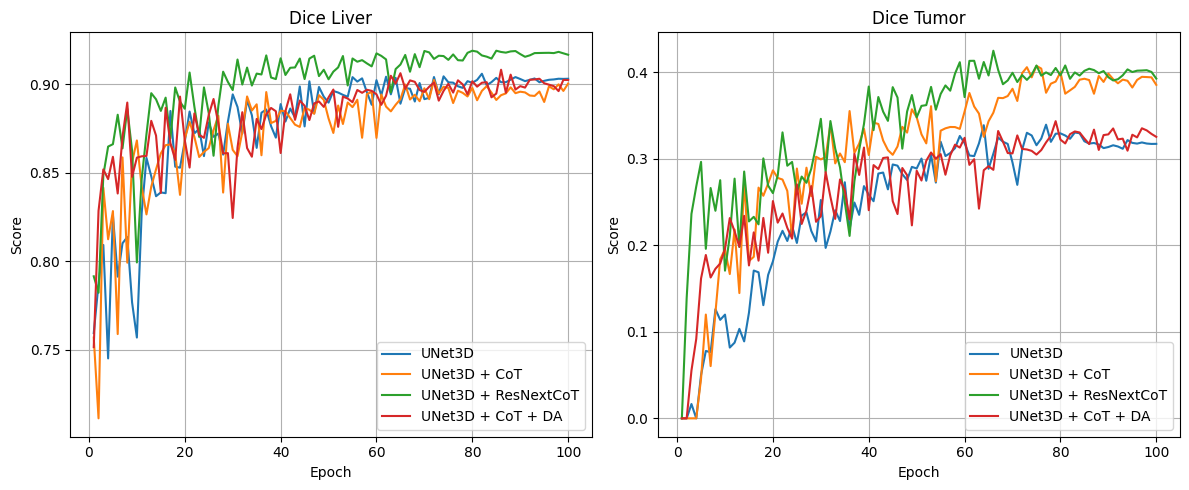

In [6]:
epochs = list(range(1, len(model_unet3d['dice_liver']) + 1))
plt.figure(figsize=(12, 5))

# Dice Liver
plt.subplot(1, 2, 1)
plt.plot(epochs, model_unet3d['dice_liver'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['dice_liver'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot['dice_liver'], label='UNet3D + ResNextCoT')
plt.plot(epochs, model_unet3d_cot_da['dice_liver'], label='UNet3D + CoT + DA')
plt.title('Dice Liver')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Dice Tumor
plt.subplot(1, 2, 2)
plt.plot(epochs, model_unet3d['dice_tumor'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['dice_tumor'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot['dice_tumor'], label='UNet3D + ResNextCoT')
plt.plot(epochs, model_unet3d_cot_da['dice_tumor'], label='UNet3D + CoT + DA')
plt.title('Dice Tumor')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Max dice avg of UNet3D: 0.6212376356124878
Max dice avg of UNet3D + CoT: 0.6526489853858948
Max dice avg of UNet3D + ResNextCoT: 0.6707391142845154
Max dice avg of UNet3D + CoT + DA: 0.6188912987709045


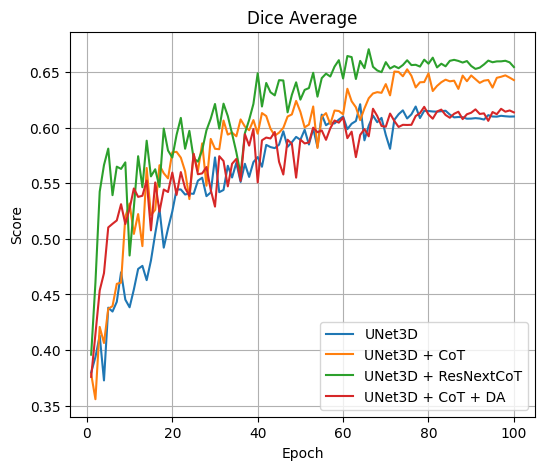

In [7]:
print(f"Max dice avg of UNet3D: {max(model_unet3d['dice_avg'])}")
print(f"Max dice avg of UNet3D + CoT: {max(model_unet3d_cot['dice_avg'])}")
print(f"Max dice avg of UNet3D + ResNextCoT: {max(model_unet3d_resnext_cot['dice_avg'])}")
print(f"Max dice avg of UNet3D + CoT + DA: {max(model_unet3d_cot_da['dice_avg'])}")


plt.figure(figsize=(6, 5))
plt.plot(epochs, model_unet3d['dice_avg'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['dice_avg'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot['dice_avg'], label='UNet3D + ResNextCoT')
plt.plot(epochs, model_unet3d_cot_da['dice_avg'], label='UNet3D + CoT + DA')
plt.title('Dice Average')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

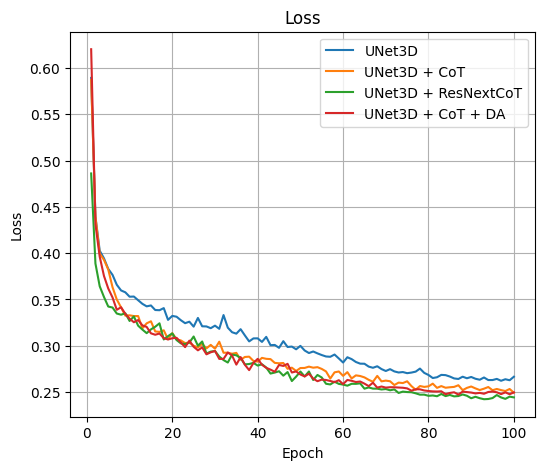

In [8]:
plt.figure(figsize=(6, 5))
plt.plot(epochs, model_unet3d['loss'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['loss'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot['loss'], label='UNet3D + ResNextCoT')
plt.plot(epochs, model_unet3d_cot_da['loss'], label='UNet3D + CoT + DA')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

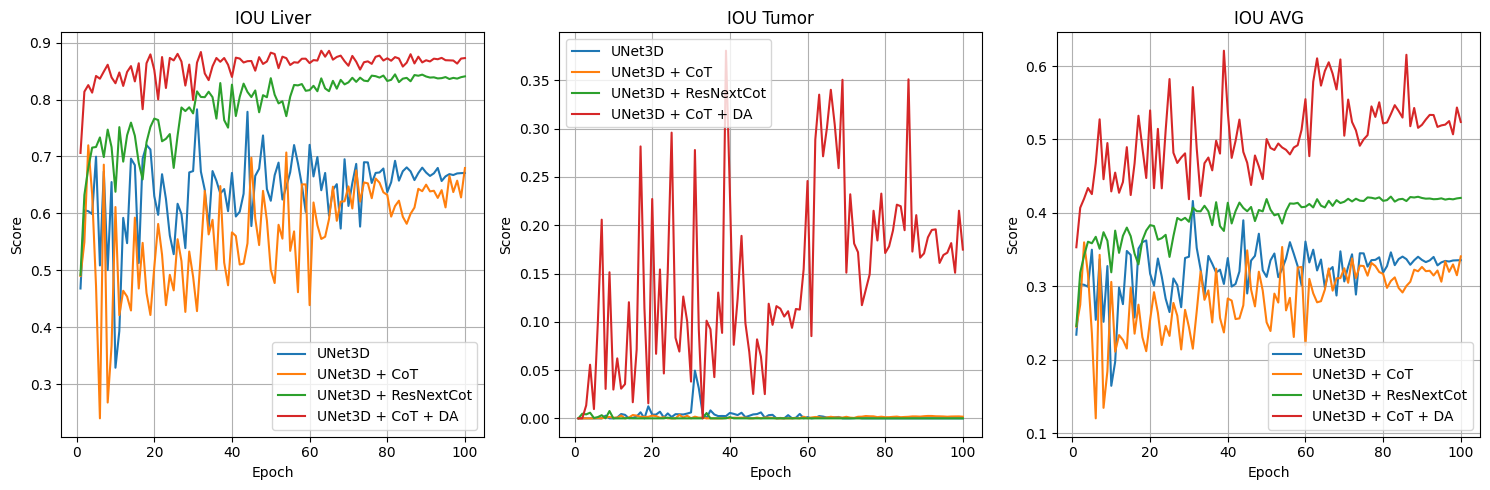

In [9]:
epochs = list(range(1, len(model_unet3d['iou_liver']) + 1))
plt.figure(figsize=(15, 5))

# IOU Liver
plt.subplot(1, 3, 1)
plt.plot(epochs, model_unet3d['iou_liver'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['iou_liver'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot["iou_liver"], label="UNet3D + ResNextCot")
plt.plot(epochs, model_unet3d_cot_da['iou_liver'], label='UNet3D + CoT + DA')
plt.title('IOU Liver')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# IOU Tumor
plt.subplot(1, 3, 2)
plt.plot(epochs, model_unet3d['iou_tumor'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['iou_tumor'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot["iou_tumor"], label="UNet3D + ResNextCot")
plt.plot(epochs, model_unet3d_cot_da['iou_tumor'], label='UNet3D + CoT + DA')
plt.title('IOU Tumor')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# IOU avg
plt.subplot(1, 3, 3)
plt.plot(epochs, model_unet3d['iou_avg'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['iou_avg'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot["iou_avg"], label="UNet3D + ResNextCot")
plt.plot(epochs, model_unet3d_cot_da['iou_avg'], label='UNet3D + CoT + DA')
plt.title('IOU AVG')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

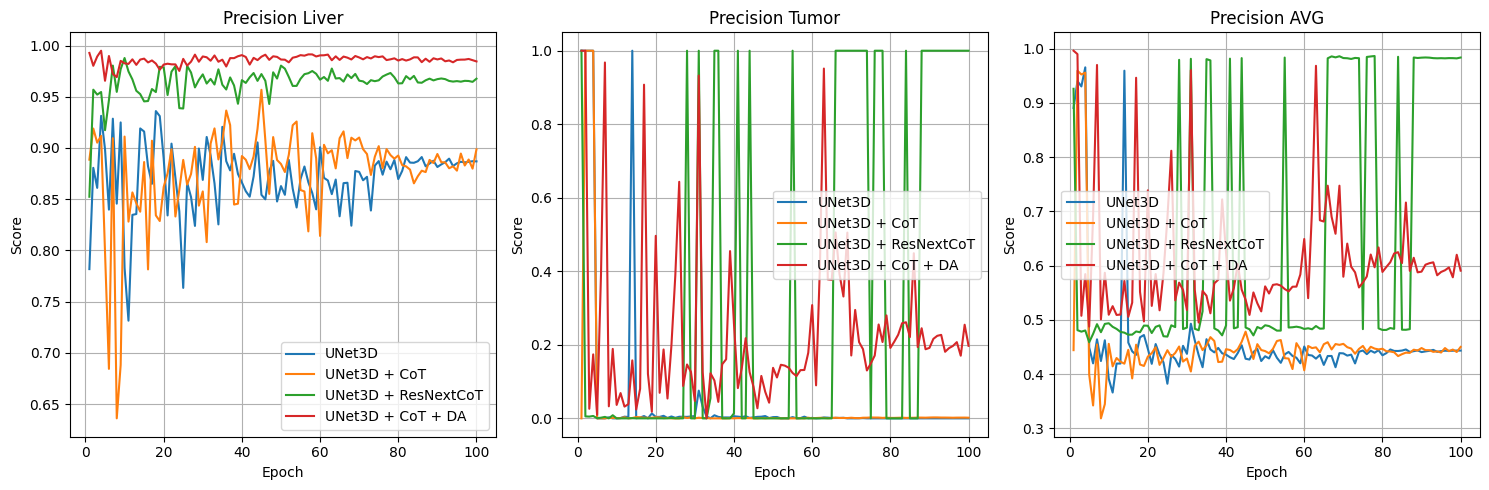

In [10]:
epochs = list(range(1, len(model_unet3d['precision_liver']) + 1))
plt.figure(figsize=(15, 5))

# Precision Liver
plt.subplot(1, 3, 1)
plt.plot(epochs, model_unet3d['precision_liver'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['precision_liver'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot['precision_liver'], label='UNet3D + ResNextCoT')
plt.plot(epochs, model_unet3d_cot_da['precision_liver'], label='UNet3D + CoT + DA')
plt.title('Precision Liver')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Precision Tumor
plt.subplot(1, 3, 2)
plt.plot(epochs, model_unet3d['precision_tumor'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['precision_tumor'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot['precision_tumor'], label='UNet3D + ResNextCoT')
plt.plot(epochs, model_unet3d_cot_da['precision_tumor'], label='UNet3D + CoT + DA')
plt.title('Precision Tumor')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Precision avg
plt.subplot(1, 3, 3)
plt.plot(epochs, model_unet3d['precision_avg'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['precision_avg'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot['precision_avg'], label='UNet3D + ResNextCoT')
plt.plot(epochs, model_unet3d_cot_da['precision_avg'], label='UNet3D + CoT + DA')
plt.title('Precision AVG')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

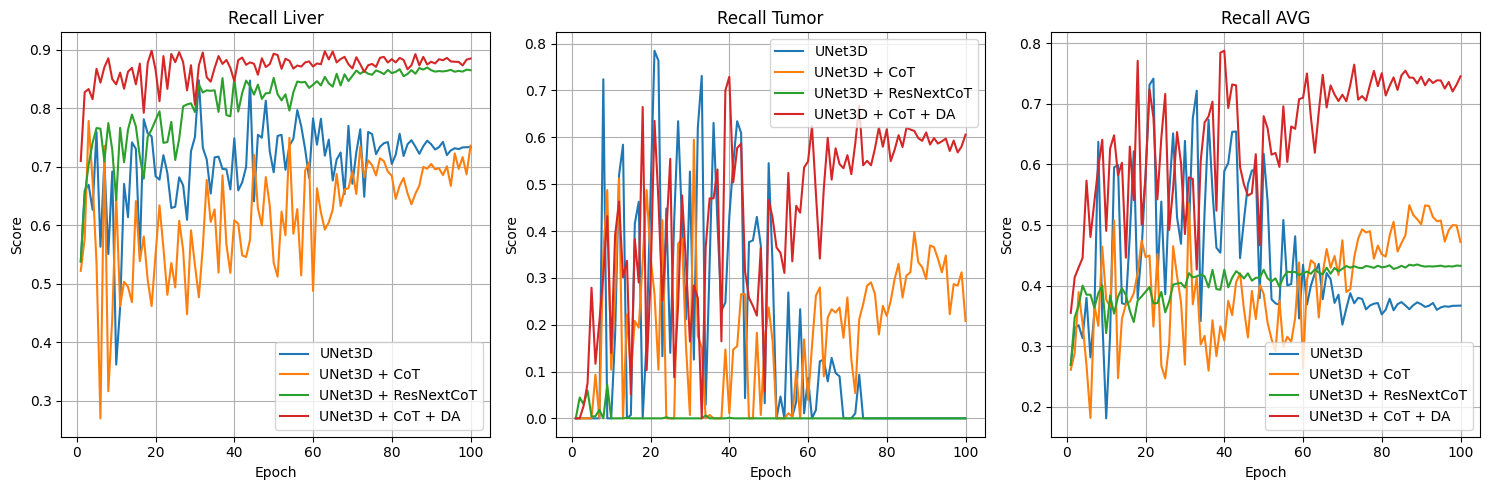

In [11]:
epochs = list(range(1, len(model_unet3d['recall_liver']) + 1))
plt.figure(figsize=(15, 5))

# Recall Liver
plt.subplot(1, 3, 1)
plt.plot(epochs, model_unet3d['recall_liver'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['recall_liver'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot['recall_liver'], label='UNet3D + ResNextCoT')
plt.plot(epochs, model_unet3d_cot_da['recall_liver'], label='UNet3D + CoT + DA')
plt.title('Recall Liver')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Recall Tumor
plt.subplot(1, 3, 2)
plt.plot(epochs, model_unet3d['recall_tumor'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['recall_tumor'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot['recall_tumor'], label='UNet3D + ResNextCoT')
plt.plot(epochs, model_unet3d_cot_da['recall_tumor'], label='UNet3D + CoT + DA')
plt.title('Recall Tumor')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Recall avg
plt.subplot(1, 3, 3)
plt.plot(epochs, model_unet3d['recall_avg'], label='UNet3D')
plt.plot(epochs, model_unet3d_cot['recall_avg'], label='UNet3D + CoT')
plt.plot(epochs, model_unet3d_resnext_cot['recall_avg'], label='UNet3D + ResNextCoT')
plt.plot(epochs, model_unet3d_cot_da['recall_avg'], label='UNet3D + CoT + DA')
plt.title('Recall AVG')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
models = ["Unet3d", "Unet3d + COT", "Unet3d + ResNextCoT", "Unet3d + COT + DA"]
time_trains = [model_unet3d['time_train'], model_unet3d_cot['time_train'], model_unet3d_resnext_cot["time_train"], model_unet3d_cot_da['time_train']]
best_epochs = [model_unet3d['best_epoch'], model_unet3d_cot['best_epoch'], model_unet3d_resnext_cot["best_epoch"],model_unet3d_cot_da['best_epoch']]

time_trains = [float(x) / 3600 for x in time_trains]

data = {
    'Model': models,
    'Best Epochs': best_epochs,
    'Time Training': time_trains
}
df = pd.DataFrame(data)


print(df)

                 Model  Best Epochs  Time Training
0               Unet3d           64      14.421150
1         Unet3d + COT           75      13.977556
2  Unet3d + ResNextCoT           66      13.794515
3    Unet3d + COT + DA           79      14.491596
